# Parte I: Análisis de la base de hogares y cálculo de pobreza

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm


## 2. 
Descarguen la base de microdatos de la EPH correspondiente al cuatro trimestre
de 2023 (la base de hogares se llama usu hogar T423.xls). Importen los datos
de la encuesta de hogar y, al igual que en el TP3, conserven solo las observaciones
que corresponden a los aglomerados de Ciudad Autónoma de Buenos Aires o
del Gran Buenos Aires. Unan, a la base de la encuesta individual, la base de
la encuesta de hogar. Asegúrense de estar usando las variables CODUSU y
NRO HOGAR para el merge.


In [22]:
#Abrimos el file y lo llamo eph

eph = pd.read_excel("/Users/juanimorozumi/Documents/GitHub/BIGDATA/tp3/usu_individual_T423.xlsx")
eph_hogares = pd.read_excel("/Users/juanimorozumi/Downloads/EPH_usu_4to_Trim_2023_xlsx/usu_hogar_T423.xlsx")

In [23]:
#Examinamos la base, vemos tamaño
print(eph.info()) 

#Vemos tamaño
num_rows, num_columns = eph.shape
print(f"\nNúmero de filas: {num_rows}")
print(f"Número de columnas: {num_columns}")

print("\n", eph.head()) 
print(eph.describe(include='all'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47337 entries, 0 to 47336
Columns: 177 entries, CODUSU to PONDIH
dtypes: float64(106), int64(66), object(5)
memory usage: 63.9+ MB
None

Número de filas: 47337
Número de columnas: 177

                           CODUSU  ANO4  TRIMESTRE  NRO_HOGAR  COMPONENTE  H15  \
0  TQRMNOSUWHLMKQCDEFNFF00852219  2023          4          1           1    1   
1  TQRMNOSUWHLMKQCDEFNFF00852219  2023          4          1           2    1   
2  TQRMNOTXQHKOLMCDEGNFJ00794590  2023          4          1           1    1   
3  TQRMNOTXQHKOLMCDEGNFJ00794590  2023          4          1           2    1   
4  TQRMNOTXQHKOLMCDEGNFJ00794590  2023          4          1           3    0   

   REGION MAS_500  AGLOMERADO  PONDERA  ...  PDECIFR  ADECIFR       IPCF  \
0      41       N           7      370  ...     12.0       12       0.00   
1      41       N           7      370  ...     12.0       12       0.00   
2      44       N          17      281  ...      

In [24]:
#Dejamos solo las observaciones de CABA y GBA
eph_ba = eph.loc[eph['AGLOMERADO'].isin([32,33])]
    
    
#Sacamos los valores negativos.
eph_ba_filtrada=eph_ba[(eph_ba["CH06"]>0)]
    

In [25]:
#Unimos a la base de la encuesta individual, la base de la encuesta de hogar
merged_data = pd.merge(eph_ba_filtrada, eph_hogares, on=['CODUSU', 'NRO_HOGAR'])

#Borramos las columnas repetidas:
columnas_a_eliminar = [col for col in merged_data.columns if col.endswith('_y')]

# Eliminamos las columnas del DataFrame
merged_data.drop(columns=columnas_a_eliminar, inplace=True)


In [26]:
output_path = '/Users/juanimorozumi/Documents/GitHub/BIGDATA/tp4/usu_individual_T423_merged.xlsx'
merged_data.to_excel(output_path, index=False, engine='openpyxl')

## 3.
Limpieza de outilers


<Figure size 800x600 with 0 Axes>

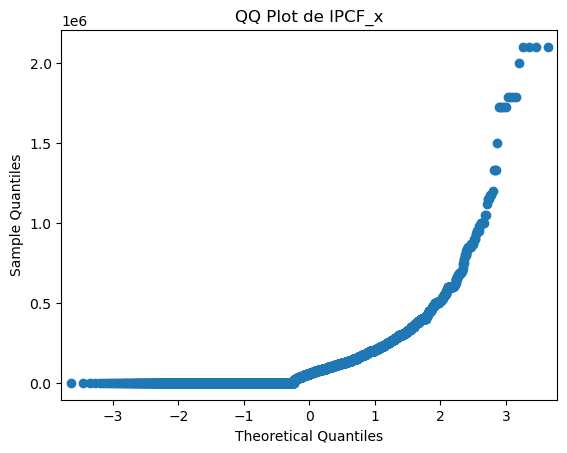

<Figure size 800x600 with 0 Axes>

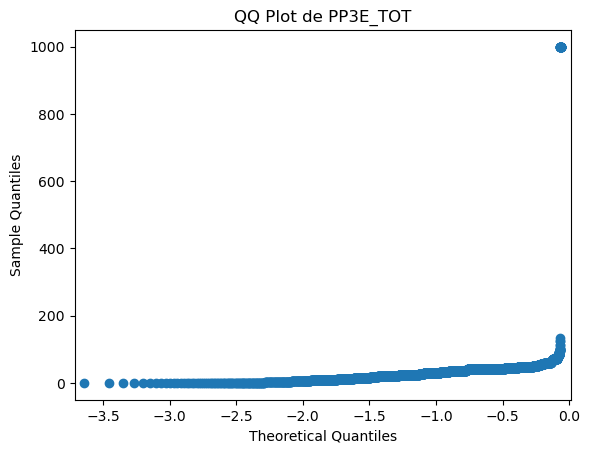

<Figure size 800x600 with 0 Axes>

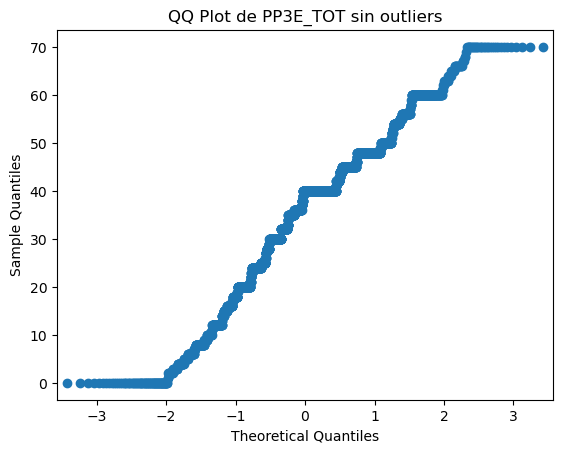

In [27]:
# Gráfico QQ para 'IPCF_x'
plt.figure(figsize=(8, 6))
sm.qqplot(merged_data['IPCF_x'])
plt.title('QQ Plot de IPCF_x')
plt.show()

# Gráfico QQ para 'PP3E_TOT'
plt.figure(figsize=(8, 6))
sm.qqplot(merged_data['PP3E_TOT'])
plt.title('QQ Plot de PP3E_TOT')
plt.show()

#quiero limpiar horas trabajadas en total:
# Calculamos el percentil 95
percentile_95 = merged_data['PP3E_TOT'].quantile(0.95)

# Filtramos los datos para eliminar los outliers (valores por encima del percentil 95)
filtered_data = merged_data[merged_data['PP3E_TOT'] <= percentile_95]


# Gráfico QQ para 'PP3E_TOT' limpio
plt.figure(figsize=(8, 6))
sm.qqplot(filtered_data['PP3E_TOT'])
plt.title('QQ Plot de PP3E_TOT sin outliers')
plt.show()

# 4 
Creación de variables que no estén en la base de datos que puedan ser relevantes para el modelo.

In [28]:
# Creamos nuevas variables
merged_data['IX_MEN10'] = merged_data.apply(lambda row: row['IX_MEN10'], axis=1)
merged_data['CAT_OCUP'] = merged_data.apply(lambda row: row['CAT_OCUP'], axis=1)
merged_data['II7'] = merged_data.apply(lambda row: row['II7'], axis=1)

merged_data['PROP_NINOS'] = merged_data['IX_MEN10'] / merged_data['IX_TOT']
merged_data['PROP_EMPLEADOS'] = merged_data['CAT_OCUP'] / merged_data['IX_TOT']
merged_data['DEPENDENCIA_ECONOMICA'] = merged_data['II7'] / (merged_data['IX_TOT'] - merged_data['II7'])

# vemos que no hayan divisiones por cero
merged_data.replace([float('inf'), -float('inf')], 0, inplace=True)

## 5. 
Presenten estad´ısticas descriptivas de cinco variables de la encuesta de hogar
que ustedes creen que pueden ser relevantes para predecir pobreza. Comenten
las estad´ısticas obtenidas.

In [29]:
# Elgimos estas variabels relevantes
df = merged_data 
variables_relevantes = ['IPCF_x', 'CH04', 'CH06', 'NIVEL_ED', 'PP3E_TOT']
df_relevantes = df[variables_relevantes]

#Hacemos estadística descriptiva de las variables 
estadisticas_descriptivas = df_relevantes.describe(include='all')

#Imprimimos esta información
print("Estadísticas descriptivas de las variables seleccionadas:")
print(estadisticas_descriptivas)


Estadísticas descriptivas de las variables seleccionadas:
             IPCF_x         CH04         CH06     NIVEL_ED     PP3E_TOT
count  7.332000e+03  7332.000000  7332.000000  7332.000000  3490.000000
mean   1.050830e+05     1.526732    38.516367     3.811511    43.165043
std    1.635742e+05     0.499319    22.812489     1.747751    81.450140
min    0.000000e+00     1.000000     1.000000     1.000000     0.000000
25%    0.000000e+00     1.000000    19.000000     3.000000    24.000000
50%    5.788889e+04     2.000000    37.000000     4.000000    40.000000
75%    1.480000e+05     2.000000    56.000000     5.000000    48.000000
max    2.100000e+06     2.000000   101.000000     7.000000   999.000000


## 6 
Presenten un gRÁfico (que no sea de barras ni una matriz de correlación) para
describir la interacción o relación entre dos o más variables. Comenten el gráfico
y la relación entre variables.

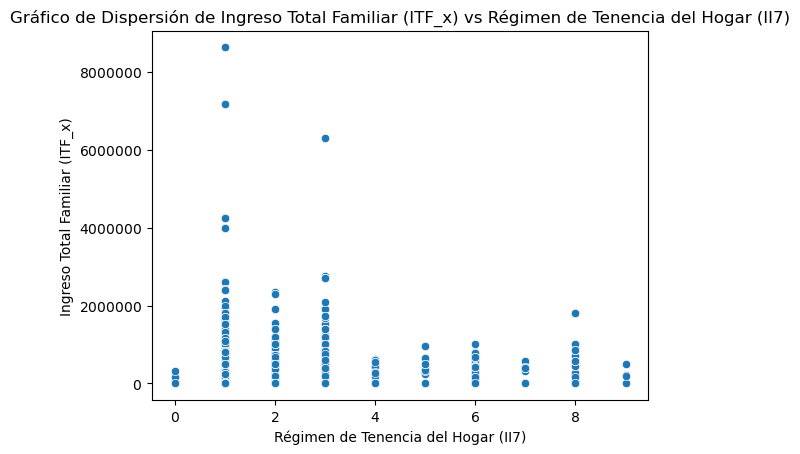

In [35]:
import seaborn as sns
from matplotlib.ticker import ScalarFormatter
# Suponiendo que df es tu DataFrame
df = filtered_data

# Crear el gráfico de dispersión con Seaborn
sns.scatterplot(x=df['II7'], y=df['ITF_x'])

# Configurar los ejes para que no usen notación científica
ax = plt.gca()  # Obtener los ejes actuales
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='plain', axis='both', useOffset=False)

# Añadir etiquetas y título
plt.title('Gráfico de Dispersión de Ingreso Total Familiar (ITF_x) vs Régimen de Tenencia del Hogar (II7)')
plt.xlabel('Régimen de Tenencia del Hogar (II7)')
plt.ylabel('Ingreso Total Familiar (ITF_x)')

# Mostrar el gráfico
plt.show()

## 7.
Repitan el inciso 1.2.f del TP3 para construir la columna adulto equiv y la
columna ad equiv hogar 

In [ ]:
# Cargar los datos
data = pd.read_excel(file_path_eph)
adulto_equiv = pd.read_excel(file_path_adulto_equiv, skiprows=3, usecols='A:C', nrows=27)

def limpiar_edad(edad):
    '''
    edad es un string que tiene edad y más datos así que queremos que devuelva solo la edad en número
    '''
    if 'más de' in edad:
        edad = 75
        
    elif 'Menor de' in edad:
        edad = 0
        
    elif 'a ' in edad:
        edad = int(edad.split(' ')[0])
        
    elif len(edad.split(' ')) == 1:
            edad = int(edad[0:1])
    else:
        edad = int(edad.split(' ')[0])
        
    return edad

#sacamos las filas vacías es decir deja las filas que tienen datos no nulos
adulto_equiv = adulto_equiv.dropna()

#aplicamos la función que definimos antes:
adulto_equiv['Edad'] = adulto_equiv['Edad'].apply(limpiar_edad)

#miro que edades ya tengo 
edades_existentes = adulto_equiv['Edad'].unique()

# hago una lista con edades existentes es decir hasta los 99 años
todas_las_edades = pd.DataFrame({'Edad': range(100)})

# Fusionar el DataFrame con todas las edades con el DataFrame original
adulto_equiv = pd.merge(todas_las_edades, adulto_equiv, on='Edad', how='left')

# Rellenar las filas faltantes copiando los valores de la fila anterior
adulto_equiv.fillna(method='ffill', inplace=True)

# Guardamos el DataFrame como archivo Excel
adulto_equiv.to_excel('tabla_final.xlsx', index=False)

In [ ]:
im

# Crear dos DataFrames basados en la condición de ITF
respondieron = df_merged[df_merged['ITF'] > 0].copy()
norespondieron = df_merged[df_merged['ITF'] == 0].copy()

# Definimos la canasta basica de INDEC
canasta_basica = 132853.3

#Ingreso necesario de los que respondieron
respondieron.loc[:, 'ingreso_necesario'] = respondieron['ad_equiv_hogar'] * canasta_basica

# Calcular si la familia es pobre en respondieron
respondieron.loc[:, 'pobre'] = (respondieron['ITF'] < respondieron['ingreso_necesario']).astype(int)

print(respondieron)